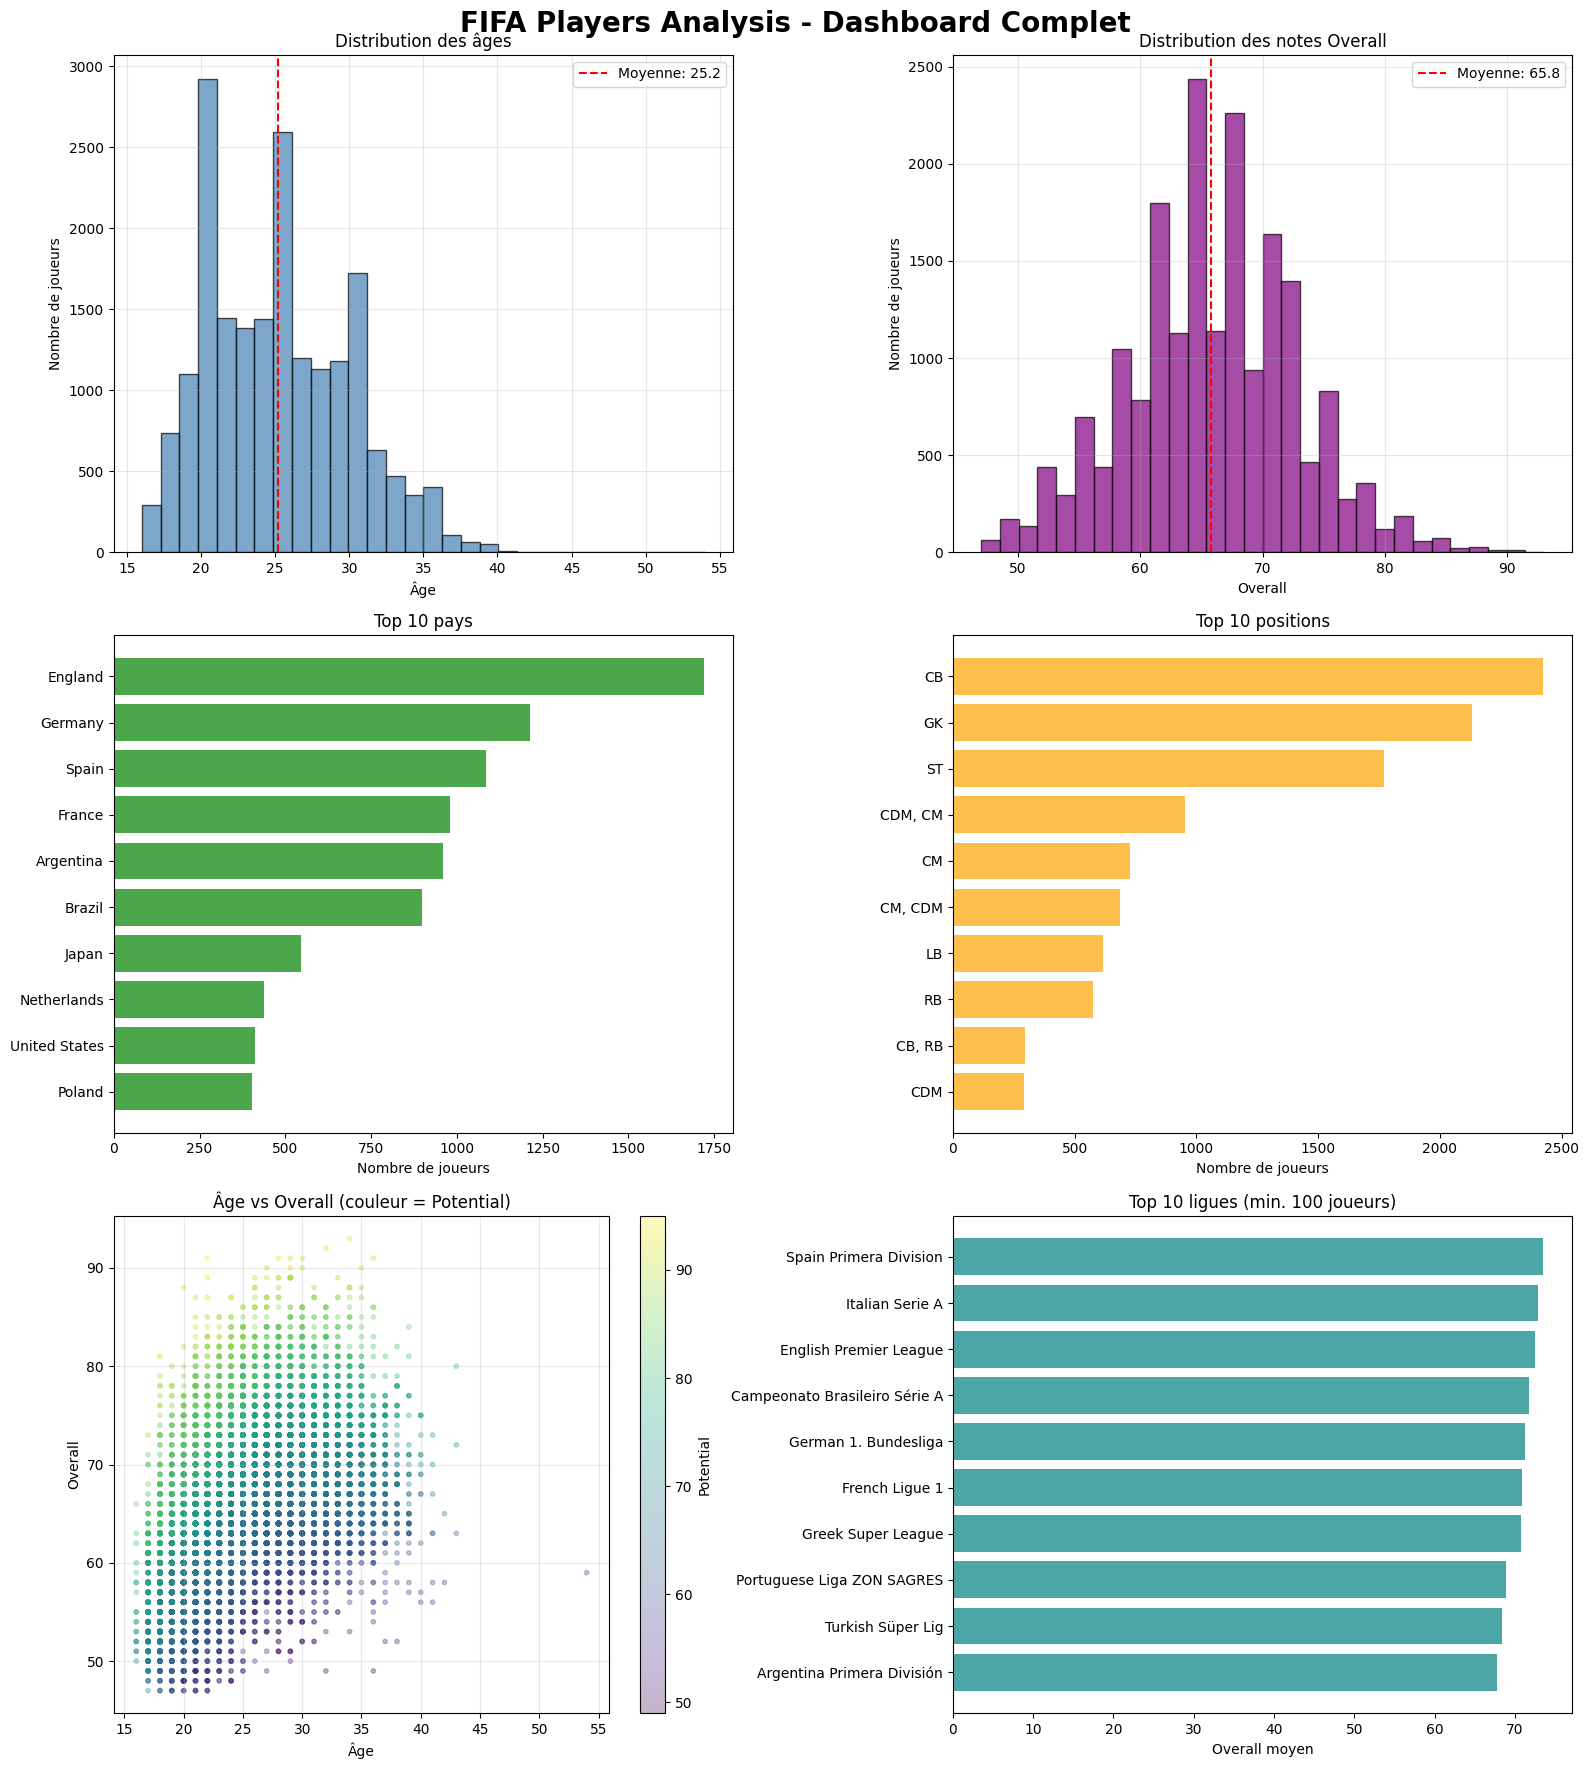

✅ Dashboard sauvegardé!


In [2]:
# ===== CELLULE 1 : Dashboard complet =====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/players_clean.csv')

# Créer un dashboard avec 6 graphiques
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('FIFA Players Analysis - Dashboard Complet', fontsize=20, fontweight='bold')

# 1. Distribution des âges
axes[0, 0].hist(df['age'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Nombre de joueurs')
axes[0, 0].set_title('Distribution des âges')
axes[0, 0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["age"].mean():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Distribution overall
axes[0, 1].hist(df['overall'], bins=30, color='purple', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Overall')
axes[0, 1].set_ylabel('Nombre de joueurs')
axes[0, 1].set_title('Distribution des notes Overall')
axes[0, 1].axvline(df['overall'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["overall"].mean():.1f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Top 10 pays
top_countries = df['nationality_name'].value_counts().head(10)
axes[1, 0].barh(range(len(top_countries)), top_countries.values, color='green', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_countries)))
axes[1, 0].set_yticklabels(top_countries.index)
axes[1, 0].set_xlabel('Nombre de joueurs')
axes[1, 0].set_title('Top 10 pays')
axes[1, 0].invert_yaxis()

# 4. Top 10 positions
top_positions = df['player_positions'].value_counts().head(10)
axes[1, 1].barh(range(len(top_positions)), top_positions.values, color='orange', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_positions)))
axes[1, 1].set_yticklabels(top_positions.index)
axes[1, 1].set_xlabel('Nombre de joueurs')
axes[1, 1].set_title('Top 10 positions')
axes[1, 1].invert_yaxis()

# 5. Âge vs Overall
scatter = axes[2, 0].scatter(df['age'], df['overall'], alpha=0.3, s=10, c=df['potential'], cmap='viridis')
axes[2, 0].set_xlabel('Âge')
axes[2, 0].set_ylabel('Overall')
axes[2, 0].set_title('Âge vs Overall (couleur = Potential)')
axes[2, 0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[2, 0], label='Potential')

# 6. Top 10 ligues
top_leagues = df.groupby('league_name').agg({'short_name': 'count', 'overall': 'mean'})
top_leagues = top_leagues[top_leagues['short_name'] >= 100]
top_leagues = top_leagues.sort_values('overall', ascending=False).head(10)
axes[2, 1].barh(range(len(top_leagues)), top_leagues['overall'], color='teal', alpha=0.7)
axes[2, 1].set_yticks(range(len(top_leagues)))
axes[2, 1].set_yticklabels(top_leagues.index)
axes[2, 1].set_xlabel('Overall moyen')
axes[2, 1].set_title('Top 10 ligues (min. 100 joueurs)')
axes[2, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('../visualizations/dashboard_complet.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Dashboard sauvegardé!")